# MKTG 685 - Machine Learning in Marketing
# Essentials of Natural Language Processing
# NLP Basic IV - Brand Perceptual Map
# Exam 2 (Take-Home Exam)

Hyunhwan "Aiden" Lee

> Assistant Professor of Marketing, College of Business, California State University Long Beach

Copyright (c) 2021 ~ present

In this homework, we will create a brand perceptual map usign topic modeling and sentiment analysis. Through this homework, you will review what we studied so far in text mining and natural language processing. Please follow the code in the next lines.

To complete this assingment, please "save a copy in Drive" and complete the codes.
Also, run all the codes before you submit.
Then, submit your "ipynb" file on Canvas.
**If your codes do not work or you missed/deleted output in a cell, you will not get points from the cell.**

If you have any questions, please contact to our TA.

This code is for practice in your class. To have the best result, you need to apply preprocessing we studied in our previouse class. Also, you must find the optimal number of topics. And label your topics based on the results. If the result does not look good, you must check your dataset or what you have done for the result. Available solutions to get the better result, you also can consider stopwords and POS tags.

If you do not consider these points, your analysis is not good enough to get the high score.

I would like to let you know that the code for this assignment has been fully tested and should run smoothly on Google Colab's free tier. If you come across any errors, especially in cells where you don't need to change the code, please take a moment to review your code before that cell. If you have any questions or need assistance, feel free to reach out to our TA or me. When asking about the assignment, it's helpful if you can share your Colab code link, as screenshots may not provide enough context for us to identify the issue.

## Brand Perceptual Map


Brand Perceptual Map is a graphical representation of the public's or customers' perception of (a) brand(s). It can allow marketers to visualize the perception of their brand in comparison to the competition in terms of their perceived quality, reliability, and price. The data for these maps can come from surveys, studies, interviews, and focus groups. Using this data, market researchers can assess product placement, public opinions, and customer preferences. Also, additional research with the brand perceptual map can help brand managers to manage their brands in many ways, such as new product development, segmentation, targeting, positioning, and differentiation.

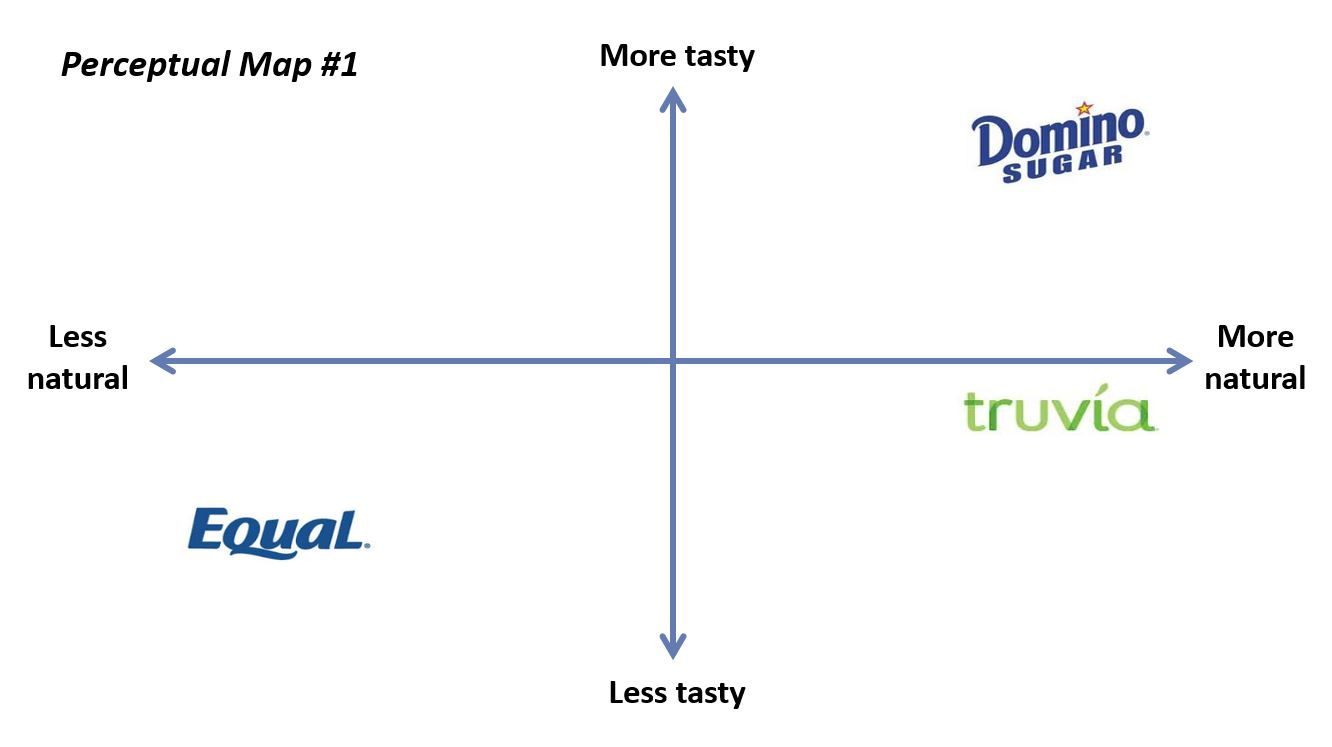

In the code below, you will install requirement. If needed, please restart runtime by clicking "RESTART RUNTIME" buttonas below:

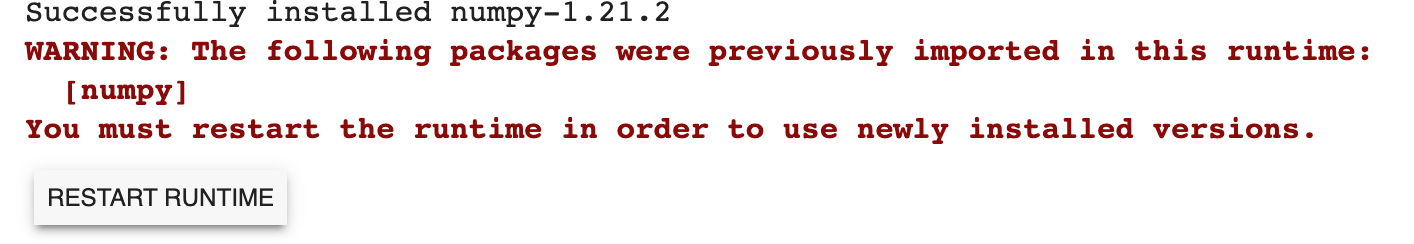

In [ ]:
# !!! DO NOT CHANGE THIS CODE !!!
# requirement
# If needed, you should restart runtime. Monitor your output in this cell.
# After restart runtime, please check wehter packages were installed correctly by running this cell again.
!pip install pyLDAvis
!pip install --upgrade "pandas<2.0.0"

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 13.6 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 2.0.3
    Uninstalling pandas-2.0.3:
      Successfully uninstalled pandas-2.0.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.0.3, but you have pandas 1.5.3 which is incompatible.
pyldavis 3.4.1 requires pandas>=2.0.0, but you have pandas 1.5.3 which is incompatible.


### Data & Preprocessing

In [ ]:
# !!! DO NOT CHANGE THIS CODE !!!
!wget http://snap.stanford.edu/data/amazon/productGraph/categoryFiles/reviews_Baby.json.gz
!wget http://snap.stanford.edu/data/amazon/productGraph/categoryFiles/meta_Baby.json.gz

--2024-04-09 19:21:33--  http://snap.stanford.edu/data/amazon/productGraph/categoryFiles/reviews_Baby.json.gz
Resolving snap.stanford.edu (snap.stanford.edu)... 171.64.75.80
Connecting to snap.stanford.edu (snap.stanford.edu)|171.64.75.80|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 191601185 (183M) [application/x-gzip]
Saving to: ‘reviews_Baby.json.gz’

reviews_Baby.json.g 100%[===================>] 182.72M  12.6MB/s    in 13s     

2024-04-09 19:21:46 (13.9 MB/s) - ‘reviews_Baby.json.gz’ saved [191601185/191601185]

--2024-04-09 19:21:46--  http://snap.stanford.edu/data/amazon/productGraph/categoryFiles/meta_Baby.json.gz
Resolving snap.stanford.edu (snap.stanford.edu)... 171.64.75.80
Connecting to snap.stanford.edu (snap.stanford.edu)|171.64.75.80|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 31328004 (30M) [application/x-gzip]
Saving to: ‘meta_Baby.json.gz’

meta_Baby.json.gz   100%[===================>]  29.88M  15.7MB/s    in 

In [ ]:
# !!! DO NOT CHANGE THIS CODE !!!
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
import itertools
import numpy as np

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# !!! DO NOT CHANGE THIS CODE !!!
import pandas as pd
import gzip

# code for loading Amazon review data
def parse(path):
  g = gzip.open(path, 'rb')
  for l in g:
    yield eval(l)

def getDF(path):
  i = 0
  df = {}
  for d in parse(path):
    df[i] = d
    i += 1
  return pd.DataFrame.from_dict(df, orient='index')

First, let's use meta data.

Q1) Load the downloaded meta file.

In [ ]:
# Complete the following code
df_meta = getDF('meta_Baby.json.gz')

In [ ]:
# !!! DO NOT CHANGE THIS CODE !!!
print(df_meta['asin'].iloc[:1])
### expected result ###
# 0    0188399313
# Name: asin, dtype: object

0    0188399313
Name: asin, dtype: object


In [ ]:
df_meta.head()

,asin,categories,description,title,price,imUrl,brand,related,salesRank
0,0188399313,[[Baby]],Wee-Go Glass baby bottles by LifeFactory (Baby...,Lifefactory 4oz BPA Free Glass Baby Bottles - ...,69.99,http://ecx.images-amazon.com/images/I/41Swthpd...,Lifefactory,"{'also_bought': ['B002SG7K7A', 'B003CJSXW8', '...",NaN
1,0188399518,[[Baby]],The Planet Wise Flannel Wipes are 10 super sof...,Planetwise Flannel Wipes,15.95,http://ecx.images-amazon.com/images/I/41otjnA4...,Planet Wise,"{'also_bought': ['B00G96N3YY', 'B003XSEV2O', '...",NaN
2,0188399399,[[Baby]],The Planet Wise Wipe PouchTM features our pate...,Planetwise Wipe Pouch,10.95,http://ecx.images-amazon.com/images/I/61x8h9u6...,NaN,"{'also_bought': ['B005WWI0DA', 'B005WWIMGA', '...",NaN
3,0316967297,[[Baby]],Hand crafted set includes 1 full quilt (76x86 ...,Annas Dream Full Quilt with 2 Shams,109.95,http://ecx.images-amazon.com/images/I/51%2BZ1%...,NaN,"{'also_viewed': ['B009LTER3W', 'B00575TI5Q', '...",NaN
4,0615447279,[[Baby]],Thumbuddy To Love- The Binky Fairy helps child...,Stop Pacifier Sucking without tears with Thumb...,16.95,http://ecx.images-amazon.com/images/I/51RKKENl...,,"{'also_bought': ['0979670004', '1601310234', '...",NaN


Q2) Get a list of brands from 'df_meta'


In [ ]:
# Complete the following code
brands = df_meta['brand'].unique()

In [ ]:
# !!! DO NOT CHANGE THIS CODE !!!
print(len(brands))
### expected result ###
# 2970

2970


Q3) Find the number of the products by brand.

In [ ]:
# Complete the following code
brands_freq = df_meta['brand'].value_counts().rename_axis('brand').reset_index(name='counts')  # FILL THE CODE #

In [ ]:
# !!! DO NOT CHANGE THIS CODE !!!
print(brands_freq.iloc[:1])
### expected result ###
#                brand  counts
# 0  Sweet Jojo Designs     662

                brand  counts
0  Sweet Jojo Designs     662


In [ ]:
brands_freq.head()

,brand,counts
0,Sweet Jojo Designs,662
1,Disney,483
2,Munchkin,422
3,Fisher-Price,418
4,Summer Infant,417


Q4) Keep top 10 brands. If a brand has no name, remove from the top 10 list.

In [ ]:
# Complete the following code
focal_brands = []
for brand in brands_freq.iloc[:, 0]:
  if len(brand) > 1:
    focal_brands.append(brand)
  if len(focal_brands) == 10:
    break

In [ ]:
# !!! DO NOT CHANGE THIS CODE !!!
print(focal_brands)
### expected result ###
# ['Sweet Jojo Designs', 'Disney', 'Munchkin', 'Fisher-Price', 'Summer Infant', 'Safety 1st', 'Carter&#39;s', 'Trend Lab', 'Philips Avent', 'aden + anais']

['Sweet Jojo Designs', 'Disney', 'Munchkin', 'Fisher-Price', 'Summer Infant', 'Safety 1st', 'Carter&#39;s', 'Trend Lab', 'Philips Avent', 'aden + anais']


Q5) Get meta data of focal brands.

In [ ]:
# Complete the following code
df_meta_focal = df_meta[df_meta['brand'].isin(focal_brands)]

In [ ]:
# !!! DO NOT CHANGE THIS CODE !!!
print(df_meta_focal['asin'].iloc[:1])
### expected result ###
# 136    B00000IZRM
# Name: asin, dtype: object

136    B00000IZRM
Name: asin, dtype: object


Q6) Get a list of Amazon product ID (asin) from 'df_meta_focal'.

In [ ]:
# Complete the following code
list_asin_focal = df_meta_focal['asin'].values.tolist()

In [ ]:
# !!! DO NOT CHANGE THIS CODE !!!
print(len(list_asin_focal))
df_meta_focal = df_meta_focal[df_meta_focal.columns.intersection(['asin', 'brand'])]
### expected result ###
# 4053

4053


It's time to load review data.

In [ ]:
# !!! DO NOT CHANGE THIS CODE !!!
# This may take long
df_reviews = getDF('reviews_Baby.json.gz')
df_reviews.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A28O3NP6WR5517,0188399313,Jennifer gymer,"[0, 0]","They work very well. Easy to clean, we wash th...",5.0,These bottles are great!,1369612800,"05 27, 2013"
1,AX0M1Z6ZWO52J,0188399399,Ash M.,"[1, 1]",it came early and was not disappointed. i love...,5.0,perfect,1365465600,"04 9, 2013"
2,A1KD7N84L7NIUT,0188399518,Buffy Fan,"[0, 0]",I ended up with a variety of different brands ...,4.0,Good cotton wipes,1392336000,"02 14, 2014"
3,A29CUDEIF4X1UO,0188399518,J. D. Solbach,"[1, 1]","These flannel wipes are OK, but in my opinion ...",3.0,Sending them back.,1373241600,"07 8, 2013"
4,A32592TYN6C9EM,0316967297,Amazon Customer,"[0, 0]","Cute quilt, the colors are perfect and my litt...",4.0,Very cute,1378425600,"09 6, 2013"


Q7) Keep reviews of only focal brands.

In [ ]:
# Complete the following code
df_reviews_focal = df_reviews[df_reviews['asin'].isin(list_asin_focal)]

In [ ]:
# !!! DO NOT CHANGE THIS CODE !!!
print(df_reviews_focal['reviewerID'].iloc[:1])
### expected result ###
# 864    A2HOSV1B6U645L
# Name: reviewerID, dtype: object

864    A2HOSV1B6U645L
Name: reviewerID, dtype: object


Q8) Drop columns except for asin, reviewText, and overall.

In [ ]:
# Complete the following code
df_reviews_focal = df_reviews_focal[df_reviews_focal.columns.intersection(['asin', 'reviewText', 'overall'])]

In [ ]:
# !!! DO NOT CHANGE THIS CODE !!!
print(df_reviews_focal['reviewText'].iloc[:1])
### expected result ###
# 864    I bought this for my grand children and they p...
# Name: reviewText, dtype: object

864    I bought this for my grand children and they p...
Name: reviewText, dtype: object


Q9) Add a column of brand from meta data = merge two dataframes.

In [ ]:
# Complete the following code
df_reviews_focal_brand = pd.merge(df_meta_focal, df_reviews_focal, left_on='asin', right_on='asin', how='left')

In [ ]:
# !!! DO NOT CHANGE THIS CODE !!!
print(df_reviews_focal_brand['asin'].iloc[:1])
### expected result ###
# 0    B00000IZRM
# Name: asin, dtype: object

0    B00000IZRM
Name: asin, dtype: object


Now run preprocessing from what we learned.

Q10) Remove special characters (keep only alphabets) and add a column 'cleanedText' after removing.

In [ ]:
# Complete the following code
df_reviews_focal_brand['cleanedText'] = df_reviews_focal_brand['reviewText'].str.replace("[^a-zA-Z]", " ")

<ipython-input-26-8471ee0d5dc9>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df_reviews_focal_brand['cleanedText'] = df_reviews_focal_brand['reviewText'].str.replace("[^a-zA-Z]", " ")


In [ ]:
# !!! DO NOT CHANGE THIS CODE !!!
print(df_reviews_focal_brand['cleanedText'].iloc[:2])
### expected result ###
# 0    I bought this for my grand children and they p...
# 1    A surprisingly versatile toy  Our    month old...
# Name: cleanedText, dtype: object

0    I bought this for my grand children and they p...
1    A surprisingly versatile toy  Our    month old...
Name: cleanedText, dtype: object


Q11) Keep the words have 3 letters at least in 'cleanedText' column.

In [ ]:
# Complete the following code
df_reviews_focal_brand['cleanedText'] = df_reviews_focal_brand['cleanedText'].apply(lambda x: ' '.join([w for w in str(x).split() if len(w)>2]))

In [ ]:
# !!! DO NOT CHANGE THIS CODE !!!
print(df_reviews_focal_brand['cleanedText'].iloc[:2])
### expected result ###
# 0    bought this for grand children and they played...
# 1    surprisingly versatile toy Our month old son w...
# Name: cleanedText, dtype: object

0    bought this for grand children and they played...
1    surprisingly versatile toy Our month old son w...
Name: cleanedText, dtype: object


Q12) Convert all text to lowercase in 'cleanedText' column.

In [ ]:
# Complete the following code
df_reviews_focal_brand['cleanedText'] = df_reviews_focal_brand['cleanedText'].apply(lambda x: x.lower())

In [ ]:
# !!! DO NOT CHANGE THIS CODE !!!
print(df_reviews_focal_brand['cleanedText'].iloc[:2])
### expected result ###
# 0    bought this for grand children and they played...
# 1    surprisingly versatile toy our month old son w...
# Name: cleanedText, dtype: object

0    bought this for grand children and they played...
1    surprisingly versatile toy our month old son w...
Name: cleanedText, dtype: object


Q13) Remove stopwords in 'cleanedText' column using NLTK stopwords.

In [ ]:
# Complete the following code
# this may take long time....
list_stopwords = stopwords.words('english')
tokenized_reviews = df_reviews_focal_brand['cleanedText'].apply(lambda x: x.split())
tokenized_reviews = tokenized_reviews.apply(lambda x: [item for item in x if item not in list_stopwords])

In [ ]:
# !!! DO NOT CHANGE THIS CODE !!!
print(df_reviews_focal_brand['cleanedText'].iloc[:2])
### expected result ###
# 0    bought this for grand children and they played...
# 1    surprisingly versatile toy our month old son w...
# Name: cleanedText, dtype: object

0    bought this for grand children and they played...
1    surprisingly versatile toy our month old son w...
Name: cleanedText, dtype: object


Q14) Use snowball stemmer

In [ ]:
# Complete the following code
STEMMER = SnowballStemmer('english')

In [ ]:
# !!! DO NOT CHANGE THIS CODE !!!
# This may take long...
tokenized_reviews_stem = [] # a list for the new data
for sent in tokenized_reviews:
  stemmed = [STEMMER.stem(w) for w in sent if len(str(w)) > 2]
  tokenized_reviews_stem.append(stemmed)
print(tokenized_reviews_stem[0])
### expected result ###
# ['bought', 'grand', 'children', 'play', 'thought', 'go', 'fall', 'piec', 'still', 'play']

['bought', 'grand', 'children', 'play', 'thought', 'go', 'fall', 'piec', 'still', 'play']


### Brand Association

Brand association in marketing refers to the relationship between a brand and its associated ideas, feelings, and qualities in consumers’ minds. It is an intangible form of brand recognition that is created when customers link a certain product, company, or service with certain words, ideas, and concepts. Examples of brand associations can include words, images, memories, experiences, values, and emotions. We will use topic modeling (LDA) to extract brand associations from opnline reviews. Let's use what we learned so far.

In [ ]:
# !!! DO NOT CHANGE THIS CODE !!!
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess

import pyLDAvis
import pyLDAvis.gensim_models

Q15) Create a list of words and document-word matrix.

In [ ]:
# Complete the following code
dictionary_stem = corpora.Dictionary(tokenized_reviews_stem)
corpus_stem = [dictionary_stem.doc2bow(text) for text in tokenized_reviews_stem]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# !!! DO NOT CHANGE THIS CODE !!!
print(dictionary_stem[0])
print(corpus_stem[0])
### expected result ###
# bought
# [(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 2), (7, 1), (8, 1)]

bought
[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 2), (7, 1), (8, 1)]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Q16) Run the LDA model for 15 topics and using the input files you created in the previous question.

In [ ]:
# Complete the following code
lda_model_stem = gensim.models.ldamodel.LdaModel(
  corpus= corpus_stem,
  id2word= dictionary_stem,
  num_topics= 15,
  random_state=100,
  per_word_topics=True
)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# !!! DO NOT CHANGE THIS CODE !!!
# Visualize the topics
pyLDAvis.enable_notebook()
vis_stem = pyLDAvis.gensim_models.prepare(lda_model_stem, corpus_stem, dictionary_stem)
vis_stem

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3     -0.052675 -0.013983       1        1  11.255421
8     -0.030315 -0.060797       2        1   9.563105
0      0.049145 -0.135723       3        1   8.444956
7     -0.010529 -0.073035       4        1   8.344962
14    -0.091811 -0.132896       5        1   8.000741
10     0.119834 -0.119674       6        1   7.826409
4     -0.003870  0.084375       7        1   7.420825
11     0.115753 -0.051904       8        1   6.672779
12    -0.050588  0.145462       9        1   5.875549
2     -0.118771  0.125591      10        1   5.493710
5      0.136808  0.042103      11        1   5.338302
9      0.122316  0.028113      12        1   4.905704
6      0.049460  0.083281      13        1   4.110462
1     -0.300553 -0.042446      14        1   3.729455
13     0.065794  0.121533      15        1   3.017622, topic_info=         Term          Freq         Total Category  logprob  loglift
2185    bottl  25079.000000  25079.000000  Default  30.0000  30.0000
1510      bag  10999.000000  10999.000000  Default  29.0000  29.0000
1346  monitor  13607.000000  13607.000000  Default  28.0000  28.0000
344      easi  24372.000000  24372.000000  Default  27.0000  27.0000
2802      cup  10058.000000  10058.000000  Default  26.0000  26.0000
...       ...           ...           ...      ...      ...      ...
144       one   1055.035160  46264.287518  Topic15  -4.6435  -0.2801
117      like    938.684947  37793.928578  Topic15  -4.7603  -0.1947
264      also    743.735820  19817.334722  Topic15  -4.9931   0.2181
197       lot    641.858236   8172.557503  Topic15  -5.1405   0.9565
408      keep    655.231596  13700.274358  Topic15  -5.1198   0.4605

[1140 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
707       1  0.536559  absolut
707       2  0.087783  absolut
707       3  0.056878  absolut
707       4  0.062796  absolut
707       5  0.004603  absolut
...     ...       ...      ...
1033     11  0.036291   yellow
1033     13  0.002419   yellow
1311      1  0.990082      yrs
1311      9  0.003391      yrs
1381      7  0.999713   zipper

[4076 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 9, 1, 8, 15, 11, 5, 12, 13, 3, 6, 10, 7, 2, 14])

Based on result, we can infer that the 2nd topic is about baby toy and the 8th topic is about baby satefty gate.

In [ ]:
# !!! DO NOT CHANGE THIS CODE !!!
list_dimension = ['Baby Toy', 'Baby Gate']

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### Dimensions of Reviews   

In topic modeling, we also can find which topics are in each reviews. To measure dimensions and their favorability, we also need to know dimensions and favorability of the reviews.

In [ ]:
# !!! DO NOT CHANGE THIS CODE !!!
df_reviews_focal_brand['ProbTopic2'] = 0.0
df_reviews_focal_brand['ProbTopic8'] = 0.0

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Q17) Get the probabilty of each topic by reviews

In [ ]:
# Complete the following code
result = lda_model_stem.get_document_topics(corpus_stem)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# !!! DO NOT CHANGE THIS CODE !!!
result[0]
### expected result ###
# [(3, 0.74569046), (14, 0.17551553)]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(3, 0.74569046), (14, 0.17551553)]

In [ ]:
df_reviews_focal_brand.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,asin,brand,reviewText,overall,cleanedText,ProbTopic2,ProbTopic8
0,B00000IZRM,Fisher-Price,I bought this for my grand children and they p...,5.0,bought this for grand children and they played...,0.0,0.0
1,B00000IZRM,Fisher-Price,A surprisingly versatile toy! Our 11 month old...,5.0,surprisingly versatile toy our month old son w...,0.0,0.0
2,B00000IZRM,Fisher-Price,I wanted a small gift for our 6 month old gran...,5.0,wanted small gift for our month old grandson a...,0.0,0.0
3,B00003XAKP,Summer Infant,"My son is 18 months old, and I have been using...",4.0,son months old and have been using this sheet ...,0.0,0.0
4,B00003XAKP,Summer Infant,This crib sheet is fabulous. It snaps over you...,5.0,this crib sheet fabulous snaps over your sheet...,0.0,0.0


Q18) Update probability of topic 2 and 8

In [ ]:
# Complete the following code
# this may take long time... 2 mins..
for i, topic_list in enumerate(result):
  for prob in topic_list:
    if prob[0]==1:
      df_reviews_focal_brand.at[i, 'ProbTopic2'] = float(prob[1])
    elif prob[0]==7:
      df_reviews_focal_brand.at[i, 'ProbTopic8'] = float(prob[1])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df_reviews_focal_brand.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,asin,brand,reviewText,overall,cleanedText,ProbTopic2,ProbTopic8
0,B00000IZRM,Fisher-Price,I bought this for my grand children and they p...,5.0,bought this for grand children and they played...,0.00000,0.0
1,B00000IZRM,Fisher-Price,A surprisingly versatile toy! Our 11 month old...,5.0,surprisingly versatile toy our month old son w...,0.00000,0.0
2,B00000IZRM,Fisher-Price,I wanted a small gift for our 6 month old gran...,5.0,wanted small gift for our month old grandson a...,0.00000,0.0
3,B00003XAKP,Summer Infant,"My son is 18 months old, and I have been using...",4.0,son months old and have been using this sheet ...,0.05169,0.0
4,B00003XAKP,Summer Infant,This crib sheet is fabulous. It snaps over you...,5.0,this crib sheet fabulous snaps over your sheet...,0.00000,0.0


In [ ]:
# !!! DO NOT CHANGE THIS CODE !!!
print(df_reviews_focal_brand[df_reviews_focal_brand['ProbTopic2']>0]['ProbTopic2'].iloc[0])
### expected result ###
# 0.051689762622117996

0.051689762622117996


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### Favorability of Brand Associations   

Favorability of brand association in marketing is the measure of the positive attitude or feeling that a customer has towards a product or brand. It is an important factor to consider when creating successful marketing campaigns, as it can significantly impact how a customer perceives the product and how likely they are to purchase it. To calcuate / predict / categorize favorabilty, we can use two ways: 1) overall ratings, 2) sentiment analysis.   

When we use sentiment analysis for the dimensions of sentiments, there are "neutral", "positive", and "negative." For sentiment, we can use overal as sentiment label for supervised learning. Also, we can use a lexicon-based approach such as VADER.

In [ ]:
# !!! DO NOT CHANGE THIS CODE !!!
!pip install vaderSentiment

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 2.2 MB/s eta 0:00:00


In [ ]:
# !!! DO NOT CHANGE THIS CODE !!!
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Q19) Perform the sentiment analysis using VADER. Also, store results (compound scores) of the semtiment analysis into 'sentiment' column.

In [ ]:
# Complete the following code
# This also may take long time.... over 5 mins...
# FILL THE CODE #
df_reviews_focal_brand['sentiment'] = [analyzer.polarity_scores(text)['compound'] for text in df_reviews_focal_brand['cleanedText'].values.tolist()]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# !!! DO NOT CHANGE THIS CODE !!!
print(df_reviews_focal_brand['sentiment'].iloc[0])
### expected result ###
# 0.7351

0.7351


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### Favorability of Brand Associations

Q20) Calculate favorability of brand associations by reviews using sentiment scores and topic scores. Name the columns of favorability as 'FavDim2' and 'FavDim8.'

In [ ]:
# Complete the following code
df_reviews_focal_brand['FavDim2'] = (df_reviews_focal_brand['sentiment'])*df_reviews_focal_brand['ProbTopic2']
df_reviews_focal_brand['FavDim8'] = (df_reviews_focal_brand['sentiment'])*df_reviews_focal_brand['ProbTopic8']

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# !!! DO NOT CHANGE THIS CODE !!!
print(df_reviews_focal_brand['FavDim2'].iloc[2:4])
### expected result ###
# 2    0.000000
# 3    0.034286
# Name: FavDim2, dtype: float64

2    0.000000
3    0.034286
Name: FavDim2, dtype: float64


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Q21) Create a table to show favorability of baby toy and baby security gate.

In [ ]:
# Complete the following code
result_brand_dim = df_reviews_focal_brand.groupby(['brand'])['FavDim2',	'FavDim8'].mean()

# !!! DO NOT CHANGE THIS CODE BELOW !!!
result_brand_dim.columns = list_dimension
list_focal_brands = result_brand_dim.index
result_brand_dim

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-54-4e6d78ab85c8>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  result_brand_dim = df_reviews_focal_brand.groupby(['brand'])['FavDim2',	'FavDim8'].mean()


,Baby Toy,Baby Gate
brand,,
Carter&#39;s,0.050279,0.014938
Disney,0.046098,0.019649
Fisher-Price,0.030535,0.090555
Munchkin,0.021864,0.020423
Philips Avent,0.033149,0.018284
Safety 1st,0.022060,0.027362
Summer Infant,0.028501,0.056319
Sweet Jojo Designs,0.061326,0.007966
Trend Lab,0.049268,0.014000


In [ ]:
# !!! DO NOT CHANGE THIS CODE !!!
print(result_brand_dim.iloc[2])
### expected result ###
# Baby Toy     0.030535
# Baby Gate    0.090555
# Name: Fisher-Price, dtype: float64

Baby Toy     0.030535
Baby Gate    0.090555
Name: Fisher-Price, dtype: float64


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# !!! DO NOT CHANGE THIS CODE !!!
from sklearn import preprocessing

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Q22) Normalize the favorability scores to plot a brand perceptual map

In [ ]:
# Complete the following code
x = result_brand_dim.values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
result_brand_dim = pd.DataFrame(x_scaled)
result_brand_dim = result_brand_dim -.5

# !!! DO NOT CHANGE THIS CODE BELOW !!!
result_brand_dim.columns = list_dimension
result_brand_dim.index = list_focal_brands
result_brand_dim

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Baby Toy,Baby Gate
brand,,
Carter&#39;s,0.220056,-0.415582
Disney,0.114104,-0.358536
Fisher-Price,-0.280273,0.500000
Munchkin,-0.500000,-0.349174
Philips Avent,-0.214012,-0.375064
Safety 1st,-0.495031,-0.265156
Summer Infant,-0.331816,0.085466
Sweet Jojo Designs,0.500000,-0.500000
Trend Lab,0.194445,-0.426937


In [ ]:
# !!! DO NOT CHANGE THIS CODE !!!
print(result_brand_dim.iloc[2])
### expected result ###
# Baby Toy    -0.280273
# Baby Gate    0.500000
# Name: Fisher-Price, dtype: float64

Baby Toy    -0.280273
Baby Gate    0.500000
Name: Fisher-Price, dtype: float64


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
result_brand_dim = result_brand_dim.rename(columns={'Baby Toy': 'Baby_Toy', 'Baby Gate': 'Baby_Gate'})

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### Visualization of Results: Brand Perceptual Map

Now let's plot brand perceptual map. We will use only top 2 dimensions of the category.

In [ ]:
# !!! DO NOT CHANGE THIS CODE !!!
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-65-a7eeb6de0744>:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


Q23) Plot a brand perceptual map using the two associations in the previous steps.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


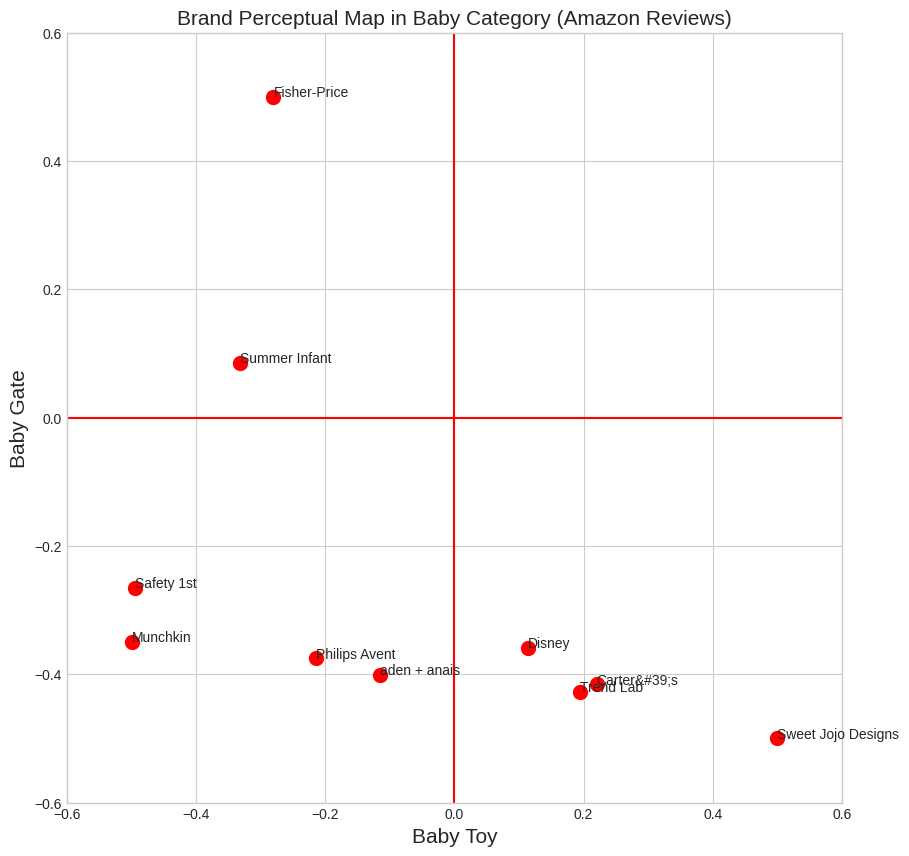

In [ ]:
# Complete the following code
annotations = list(result_brand_dim.index) # FILL THE CODE #
plt.figure(figsize=(10,10))
X = result_brand_dim.Baby_Toy
Y = result_brand_dim.Baby_Gate
plt.scatter(X,Y,s=100,color="red")
plt.xlabel('Baby Toy', fontsize=15)
plt.ylabel('Baby Gate', fontsize=15)
plt.xlim(-.6,.6)
plt.ylim(-.6,.6)
plt.axhline(y=0, color='r', linestyle='-')
plt.axvline(x=0, color='r', linestyle='-')
plt.title("Brand Perceptual Map in Baby Category (Amazon Reviews)", fontsize=15)
for i, label in enumerate(annotations):
    plt.text(X[i], Y[i],label)
plt.show()